# TP 4 : Introduction au deep learning pour le NLP


Dans ce TP; on changera un peu des bases classiques d'apprentissage statistique, pour traiter un type de données différentes : le texte. 

Pour des raisons de temps, et comme il n'y a qu'une seule séance prévue sur ce sujet, on se focalisera sur les outils deep learning, et l'on ne verra pas les algorithmes type LDA/etc. 


## Données et preprocessing

En texte, les données sont rarement aussi propres que dans les bases utilisées jusqu'à maintenant. 
Pour ce TP, on téléchargera une base de données de 50 000 descriptions de films. 

1. Télécharger les données (https://www.kaggle.com/rounakbanik/the-movies-dataset ), et ouvrir la base ```movies_metadata.csv``` avec pandas.
2. Quelles sont les variables intéressantes à prédire? Tracer leurs histogrammes. Que remarquez-vous? 

## Un premier modèle de ML classique

3. Faire un premier modèle de ML classique avec scikit learn en utilisant les variables non textuelles, évaluer.


## Embeddings

4. Apprendre des embeddings sur le corpus des descriptions des films non traité. Que remarquez-vous? 

5. Mettre en place le preprocessing adapté pour réduire la taille du vocabulaire et générer des embeddings de bonne qualité

## Des embeddings au modèle de prédiction

6. Quel problème remarquez-vous pour passer des embeddings à un modèle de prédiction? Suggérez des solutions d'aggrégation. Intégrez les résultats au modèle et évaluer. 



### 1. Télécharger les données (https://www.kaggle.com/rounakbanik/the-movies-dataset ), et ouvrir la base ```movies_metadata.csv``` avec pandas.

*Nota : il faut utiliser un compte kaggle.*


Ouvrons la base et regardons les différentes colonnes :



In [1]:
import pandas as pd

df = pd.read_csv('movies_metadata.csv', encoding='utf-8')

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### 2. Quelles sont les variables intéressantes à prédire? Tracer leurs histogrammes. Que remarquez-vous? 

Les variables intéressantes à prédire sont les suivantes : 
 - ```popularity```
 - ```revenue```
 - ```vote_average```

En effet, si l'on produit un film, on peut être intéressé par ses futurs résultats au box office, tant en terme financiers qu'en termes de popularité, ou de notes attribuées par les utilisateurs. 

On pourrait aussi vouloir prévoir les ```genres``` d'un film. Si un film était classé dans un unique genre, on serait dans le cadre d'un problème de classification classique, comme vu en cours. Si les films étaient classés dans un nombre fixe de genres (trois genres pour chaque film, par exemple), on serait dans un contexte de classification multi-label. On pourrait entraîner un prédicteur pour le premier, un prédicteur pour le deuxième et un prédicteur pour le troisième genre, par exemple, ou bien utiliser des méthodes de classification multi-label plus sophistiquées. 
Dans notre cas, les films ont un nombre de genres variable, ce qui rend complexe la modélisation de la tâche d'apprentissage. On laissera cette variable de côté pour ce TP. 


Commençons par conserver uniquement les films qui ont une description (pour la suite), et des valeurs de ```popularity, revenue, vote_average```, et étudions les caractéristiques de quelques variables. 

In [4]:
df = df.dropna(subset=['overview', 'popularity', 'revenue', 'vote_average'])
print('Number of non-missing values : \n')
print(df.count())

Number of non-missing values : 

adult                    44506
belongs_to_collection     4431
budget                   44506
genres                   44506
homepage                  7761
id                       44506
imdb_id                  44491
original_language        44496
original_title           44506
overview                 44506
popularity               44506
poster_path              44163
production_companies     44506
production_countries     44506
release_date             44435
revenue                  44506
runtime                  44506
spoken_languages         44506
status                   44441
tagline                  20404
title                    44506
video                    44506
vote_average             44506
vote_count               44506
dtype: int64


En enlevant les NaNs sur les variables à prédire et sur l'overview, il nous reste 44.506 films dans la base de donnée. Regardons la taille des ```overview``` : 

In [5]:
print(df.overview.apply(lambda x: len(x)).mean())
print(df.overview.apply(lambda x: len(x)).std())

323.3534354918438
204.9781276517869


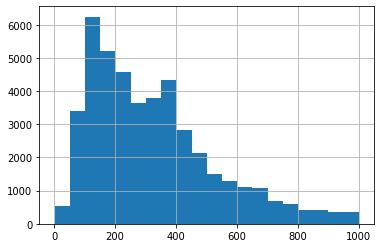

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df.overview.apply(lambda x: len(x)).hist(bins=20)

Intéressons nous maintenant aux variables à prédire : type, histogramme, etc...

In [10]:
var = df[['revenue', 'popularity', 'vote_average']]
var.head(3)

,revenue,popularity,vote_average
0,373554033.0,21.9469,7.7
1,262797249.0,17.0155,6.9
2,0.0,11.7129,6.5


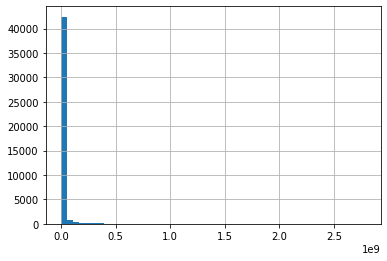

In [11]:
var.revenue.hist(bins=50)

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


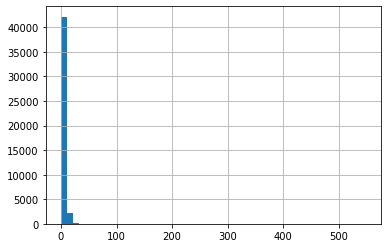

In [12]:
var['popularity'] = var.popularity.astype('float')
var.popularity.dropna().hist(bins=50)

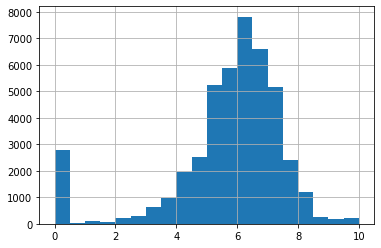

In [13]:
var.vote_average.dropna().hist(bins=20)

On observe une répartition des valeurs en décroissance exponentielle pour le ```revenue``` et la ```popularity```. 
Quelques rares films font de très gros bénéfices, et le reste n'en fait quasiment pas. 

Sur ces deux variables, on pourra donc anticiper que les modèles auront un pouvoir prédictif faible : si le modèle prédit la moyenne du  ```revenue``` ou de la ```popularity``` pour tout nouveau film, il aura probablement des métriques correctes. Pour vérifier cela, calculons le R2 et la MSE d'un modèle qui prédit la moyenne, la médiane, et 0, qui seront nos baselines : 

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
import swifter
y_true = df['revenue'].astype('float')
mean = y_true.mean()
median = y_true.median()
y_pred_mean = df['revenue'].swifter.apply(lambda x : mean )
y_pred_median = df['revenue'].swifter.apply(lambda x : median)
y_pred_zero = df['revenue'].apply(lambda x : 0)
m_rev = {'R2_mean' : r2_score(y_true, y_pred_mean),
         'MSE_mean' : mean_squared_error(y_true, y_pred_mean),
         'R2_median' : r2_score(y_true, y_pred_median),
         'MSE_median' : mean_squared_error(y_true, y_pred_median),
         'R2_zero' : r2_score(y_true, y_pred_zero),
         'MSE_zero' : mean_squared_error(y_true, y_pred_zero)}
print(m_rev)

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



{'R2_mean': 0.0, 'MSE_mean': 4224531851793593.0, 'R2_median': -0.031021668500440525, 'MSE_median': 4355583878469485.5, 'R2_zero': -0.031021668500440525, 'MSE_zero': 4355583878469485.5}


In [31]:
from sklearn.metrics import r2_score, mean_squared_error
import swifter
y_true = df['popularity'].astype('float')
mean = y_true.mean()
median = y_true.median()
y_pred_mean = df['popularity'].swifter.apply(lambda x : mean )
y_pred_median = df['popularity'].swifter.apply(lambda x : median)
y_pred_zero = df['popularity'].apply(lambda x : 0)
m_pop = {'R2_mean' : r2_score(y_true, y_pred_mean),
         'MSE_mean' : mean_squared_error(y_true, y_pred_mean),
         'R2_median' : r2_score(y_true, y_pred_median),
         'MSE_median' : mean_squared_error(y_true, y_pred_median),
         'R2_zero' : r2_score(y_true, y_pred_zero),
         'MSE_zero' : mean_squared_error(y_true, y_pred_zero)}
print(m_pop)

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



{'R2_mean': 0.0, 'MSE_mean': 36.699869285094465, 'R2_median': -0.0894674351655893, 'MSE_median': 39.983312460944255, 'R2_zero': -0.24066084369468177, 'MSE_zero': 45.53209079072983}


Les métriques sont, de manière contre-intuitive, très mauvaises. Elles nous serviront de baseline pour la suite. 

Regardons maintenant le ```vote_average```. Sa répartition, hormis les 0, ressemble vaguement à une gaussienne, ce qui semblerait en faire une variable plus facile à prédire (d'autant qu'elle est bornée). On verra dans la suite que ce n'est pas le cas. 

Déterminons notre baseline à battre sur le ```vote_average```. 


In [32]:
from sklearn.metrics import r2_score, mean_squared_error
import swifter
y_true = df['vote_average'].astype('float')
mean = y_true.mean()
median = y_true.median()
y_pred_mean = df['vote_average'].swifter.apply(lambda x : mean )
y_pred_median = df['vote_average'].swifter.apply(lambda x : median)
y_pred_zero = df['vote_average'].apply(lambda x : 0)
m_vot = {'R2_mean' : r2_score(y_true, y_pred_mean),
         'MSE_mean' : mean_squared_error(y_true, y_pred_mean),
         'R2_median' : r2_score(y_true, y_pred_median),
         'MSE_median' : mean_squared_error(y_true, y_pred_median),
         'R2_zero' : r2_score(y_true, y_pred_zero),
         'MSE_zero' : mean_squared_error(y_true, y_pred_zero)}

print(m_vot)

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



{'R2_mean': 0.0, 'MSE_mean': 3.5978780790618203, 'R2_median': -0.03624568217230317, 'MSE_median': 3.7282856244101916, 'R2_zero': -8.837700627568308, 'MSE_zero': 35.39484743630072}


Aucune de nos baselines naïve ne semble parvenir à saisir le phénomène. Essayons de prédire les 3 variables avec un modèle de machine learning classique. 

## 4. Premier modèle ML classique

Dans cette partie, on va directement appliquer ce que l'on a fait dans les dernier TP : du boosting, avec des hyperparamètres optimaux, grâce à GridSearchCV.

Nous regarderons comment notre modèle performe par rapport à nos baselines. 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

In [54]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Sur l'ensemble de ces colonnes, on va sélectionner les features suivantes : 

In [49]:
df['popularity'] = df.popularity.astype('float') # Preprocessing de popularity : on le repasse en float.
df['budget'] = df.budget.astype('float')
dataset = dataset[['adult', 'budget', 'runtime', 'original_language', 'popularity', 'vote_average', 'revenue']]

In [41]:
dataset.head()

,adult,budget,runtime,original_language,popularity,vote_average,revenue
0,False,30000000.0,81.0,en,21.946943,7.7,373554033.0
1,False,65000000.0,104.0,en,17.015539,6.9,262797249.0
2,False,0.0,101.0,en,11.712900,6.5,0.0
3,False,16000000.0,127.0,en,3.859495,6.1,81452156.0
4,False,0.0,106.0,en,8.387519,5.7,76578911.0


Transformons efficacement le langage original et la variable ```adult``` en des variables numériques : 

In [50]:
from collections import Counter
dic_language = Counter(dataset.original_language)
dic_language = {list(dic_language.keys())[i]: i for i in range(len(dic_language))}

In [51]:
dataset['adult'] = dataset.adult.apply(lambda x: 1 if x==True else 0)

In [52]:
dataset['original_language'] = dataset.original_language.apply(lambda x: dic_language[x])

In [53]:
dataset.head()

,adult,budget,runtime,original_language,popularity,vote_average,revenue
0,1,30000000.0,81.0,0,21.946943,7.7,373554033.0
1,1,65000000.0,104.0,0,17.015539,6.9,262797249.0
2,1,0.0,101.0,0,11.712900,6.5,0.0
3,1,16000000.0,127.0,0,3.859495,6.1,81452156.0
4,1,0.0,106.0,0,8.387519,5.7,76578911.0


Prenons les hyperparamètres d'AdaBoot, en régression, pour écrire notre ```param_grid```

In [54]:
AdaBoostRegressor().get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [57]:
from sklearn.tree import DecisionTreeRegressor
params_grid = {'base_estimator': [DecisionTreeRegressor(max_depth=2), 
                                  DecisionTreeRegressor(max_depth=3), 
                                  DecisionTreeRegressor(max_depth=10)],
                 'learning_rate': [0.01, 0.1, 1.0, 10],
                 'n_estimators': [10, 50]}

In [61]:
import numpy as np
rg = GridSearchCV(AdaBoostRegressor(), param_grid=params_grid, scoring='r2', verbose=0)
rg.fit(dataset[['adult', 'budget', 'runtime', 'original_language']], np.ravel(dataset[['popularity']]))

pd.DataFrame(rg.cv_results_).sort_values('rank_test_score').head()

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,0.640055,0.012622,0.051944,0.004056,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,50,{'base_estimator': DecisionTreeRegressor(crite...,0.096353,0.281116,0.110498,0.162654,0.083962,1
0,0.121591,0.012590,0.008407,0.000801,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,10,{'base_estimator': DecisionTreeRegressor(crite...,0.124495,0.261629,0.077706,0.154609,0.078047,2
1,0.600410,0.020549,0.043912,0.001898,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,50,{'base_estimator': DecisionTreeRegressor(crite...,-0.012937,0.265618,0.079618,0.110764,0.115833,3
10,0.136100,0.002566,0.010218,0.000843,"DecisionTreeRegressor(criterion='mse', max_dep...",0.1,10,{'base_estimator': DecisionTreeRegressor(crite...,-0.057560,0.230740,0.111276,0.094815,0.118273,4
8,0.130431,0.002048,0.009425,0.000586,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,10,{'base_estimator': DecisionTreeRegressor(crite...,-0.112713,0.276473,0.105416,0.089721,0.159273,5


In [62]:
rg = GridSearchCV(AdaBoostRegressor(), param_grid=params_grid, scoring='r2')
rg.fit(dataset[['adult', 'budget', 'runtime', 'original_language']], np.ravel(dataset[['vote_average']]))

pd.DataFrame(rg.cv_results_).sort_values('rank_test_score').head()

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
16,0.240256,0.002196,0.020614,0.004333,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,10,{'base_estimator': DecisionTreeRegressor(crite...,-0.123594,0.032290,-0.001499,-0.030937,0.066957,1
17,1.193484,0.020967,0.087888,0.000454,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,50,{'base_estimator': DecisionTreeRegressor(crite...,-0.151792,0.037032,0.010584,-0.034728,0.083481,2
8,0.152484,0.015153,0.011389,0.000510,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,10,{'base_estimator': DecisionTreeRegressor(crite...,-0.146983,0.033184,0.002940,-0.036955,0.078778,3
9,1.057945,0.037352,0.076672,0.022425,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,50,{'base_estimator': DecisionTreeRegressor(crite...,-0.177200,0.040956,0.012733,-0.041173,0.096876,4
18,0.232357,0.004079,0.017019,0.000077,"DecisionTreeRegressor(criterion='mse', max_dep...",0.1,10,{'base_estimator': DecisionTreeRegressor(crite...,-0.183034,0.037673,0.009902,-0.045156,0.098155,5


In [63]:
rg = GridSearchCV(AdaBoostRegressor(), param_grid=params_grid, scoring='r2')
rg.fit(dataset[['adult', 'budget', 'runtime', 'original_language']], np.ravel(dataset[['revenue']]))

pd.DataFrame(rg.cv_results_).sort_values('rank_test_score').head()

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,0.654226,0.026688,0.043823,0.001362,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,50,{'base_estimator': DecisionTreeRegressor(crite...,0.474703,0.701893,0.626633,0.601073,0.094495,1
8,0.129664,0.000324,0.008806,0.001020,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,10,{'base_estimator': DecisionTreeRegressor(crite...,0.477187,0.697255,0.590728,0.588387,0.089858,2
10,0.163932,0.022069,0.013726,0.008373,"DecisionTreeRegressor(criterion='mse', max_dep...",0.1,10,{'base_estimator': DecisionTreeRegressor(crite...,0.440418,0.694409,0.612085,0.582301,0.105809,3
2,0.141499,0.023121,0.010937,0.001691,"DecisionTreeRegressor(criterion='mse', max_dep...",0.1,10,{'base_estimator': DecisionTreeRegressor(crite...,0.425738,0.667962,0.575246,0.556313,0.099790,4
1,0.609147,0.041776,0.045325,0.002200,"DecisionTreeRegressor(criterion='mse', max_dep...",0.01,50,{'base_estimator': DecisionTreeRegressor(crite...,0.422199,0.660887,0.580706,0.554594,0.099178,5


Essayons une forêt aléatoire, sans hyperparameter tuning : 

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [66]:
print(cross_val_score(RandomForestRegressor(), 
                dataset[['adult', 'budget', 'runtime', 'original_language']], 
                np.ravel(dataset[['revenue']]),
                scoring='r2').mean())
print(cross_val_score(RandomForestRegressor(), 
                dataset[['adult', 'budget', 'runtime', 'original_language']], 
                np.ravel(dataset[['popularity']]),
                scoring='r2').mean())
print(cross_val_score(RandomForestRegressor(), 
                dataset[['adult', 'budget', 'runtime', 'original_language']], 
                np.ravel(dataset[['vote_average']]),
                scoring='r2').mean())

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

0.5087509909517786


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

-0.662762819102822


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

-0.11007432676573552


Pour résumer, jusqu'à maintenant, nous avons, en score R2 : 

|                  | Revenue | Popularity | Vote Average |
|------------------|---------|------------|--------------|
| AdaBoost         | 60.10%  | 16%        | -3.09%       |
| Random Forest    | 50.87%  | -66.27%    | -11%         |
|  Baseline - mean | 0%      | 0%         | 0%           |

Le ```revenue``` est de loin la variable la plus facile à prédire, contre toute attente si l'on se fiait aux histogrammes de répartition des valeurs des variables à prédire. 

Dans la partie qui suit, on va ajouter l'information sémantique contenue dans les ```overview```. Pour cela, on va introduire le concept d'embedding, et décrire le réseau de neurones utilisé pour le Word2Vec, qui permet de générer des embeddings relativement puissant, simplement.

## 5. Word2vec avec gensim


Avant de décrire le Word2Vec, nous allons poser quelquesbases du deep learning : les réseaux de neurones denses. 

### 5.1 Introduction aux réseaux de neurones artificiels

#### 5.1.1 Neurones artificiels

L'idée de copier et de simplifier le neurone a été explorée pour
 la première fois par Rosenblatt, avec son Perceptron (1957). Certains changements ont été apportés
 depuis cette première modélisation, mais elle ressemble encore un
  peu au modèle biologique d'un neurone : un neurone biologique 
  reçoit des signaux d'autres neurones et émet un signal 
  en réponse, en fonction de certaines
règles d'activation. Un neurone artificiel fonctionne de manière similaire : 
il prend en entrée $n$ signaux $(x_1, x_2, ...., x_n)$, 
et émet le signal $y = f(w_1 x_1 + ... + w_n x_n)$, 
où $f$ est appelé la fonction d'*activation*, 
et $w_1, ..., w_n$ sont appelés les poids 
du neurone. 


Si $f = Id$, le neurone effectue une 
régression linéaire de $y$ sur $(x_i)_{i=1, ...., n}$ en 
ajustant les poids grâce aux données d'apprentissage. 
Plus généralement, les fonctions d'activation choisies sont 
non linéraires, comme la fonction ReLU, et souvent bornées, comme la fonction 
sigmoïde ($\sigma$), la tangente hyperbolique ($\tanh$) :


\begin{eqnarray*}
    \forall x \in \mathbb{R}, \sigma(x) &=& \frac{1}{1+e^{-x}} \\
    \forall x \in \mathbb{R}, \tanh(x) &=& \frac{e^{2x}-1}{e^{2x}+1} \\
    \forall x \in \mathbb{R}, \text{ReLU}(x) &=& \max(0, x) 
\end{eqnarray*}


Cependant, la modélisation des données avec un seul neurone 
n'apporte pas d'innovation : c'est comme si l'on utilisait des régressions 
linéaires, des régressions logistiques ou des modèles de censure.
 Par conséquent, les neurones ne sont jamais utilisés seuls : 
les neurones sont collés en plusieurs couches, 
formant un *réseau*. Expliquons maintenant le modèle de réseau de neurones le plus simple : le réseau dense. 


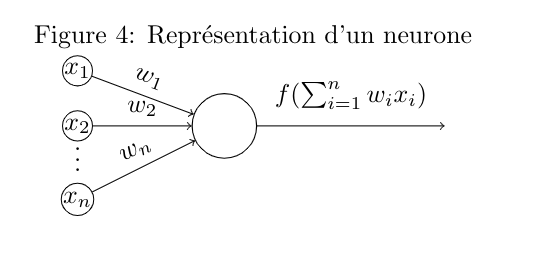

#### 5.1.2 Réseaux denses

Les réseaux denses parallélisent et mettent en série un ensemble de neurones artificiels, 
comme schématisé en Figure 5. Dans un réseau à $L\in \mathbb{N}$ couches cachées
de tailles $n_1, n_2, ..., n_L$ respectivement, les inputs sont d'abord 
passés aux $n_1$ neurones de la première couche. Chaque neurone a ses propres poids 
et calcule la réponse qu'il va donner au signal. Les réponses générées
par chacun des neurones de la première couche sont transmis comme 
inputs aux $n_2$ neurones de la seconde couche, etc. 

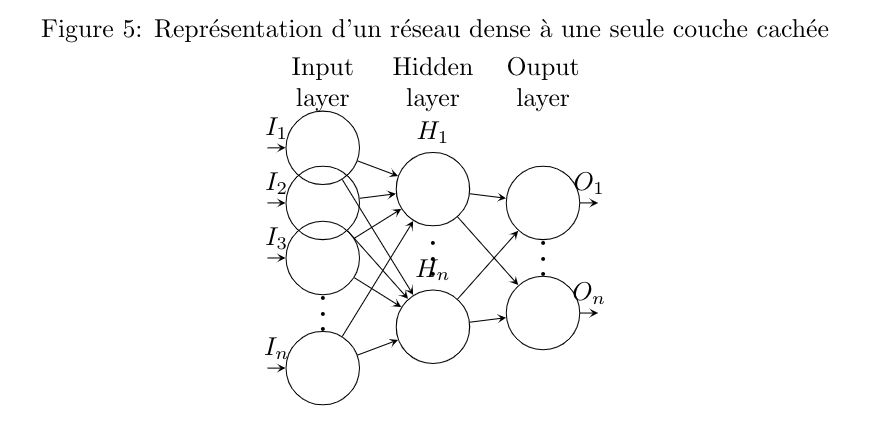



Plus formellement, définissons les notations suivantes:
soit $L$ le nombre de couches cachées, et $n_l$ le nombre de neurones
présents dans la couche $l$. Le $i$-ième neurone de la $l$-ième couche cachée
est noté $N_i^{(l)}$. 


 $N_i^{(l)}$ a $n_{l-1}$ poids : notons $w_{k, i}^{(l)}$ 
le poids de l'arrête reliant $N_{k}^{(l-1)}$ à $N_i^{(l)}$.
En outre, si l'on note $z_i^{(l)}$ le signal sortant du neurone $N_i^{(l)}$,
on a:

\begin{align*}
    z_i^{(l)} = f \left ( \sum_{k=1}^{n_{l-1}} w_{k, i}^{(l)} z_{k}^{(l-1)} \right )
\end{align*}

 Où $f$ est la fonction d'application de $N_i^{(l)}$
 (par soucis de clarté, et pour éviter des notations trop lourdes
  nous prendrons $f$ identique pour tous les neurones).

 En notant $Z^{(l)} = (z_i^{(l)})_{i=1, ..., n}$, on peut 
écrire l'équation précedente sous forme matricielle, pour la $l$-ième 
couche cachée:
\begin{align*}
    Z^{(l)} = f \left ( W^{(l)} Z^{(l-1)} \right )
\end{align*}
Où $f$ est évidemment appliquée sur chacune des coordonnées de $W^{(l)} Z^{(l-1)}$,
et où $W^{(l)} \in \mathbb{R}^{n_{l}\times n_{l-1}}  $ : 
\begin{align*}
    W^{(l)} = 
    \left (
    \begin{array}{ccc}
        w_{1, 1}^{(l)} & ... & w_{n_{l-1}, 1}^{(l)} \\
        w_{1, 2}^{(l)} & ... & w_{n_{l-1}, 2}^{(l)} \\
        \vdots & & \vdots \\
        w_{1, n_l}^{(l)} & ... & w_{n_{l-1}, n_l}^{(l)} \\
    \end{array}
    \right )
\end{align*}
L'ensemble des matrices contenant les poids de chacune
des couches cachées sera appelé $\mathcal{W} := {W^{(l)}}_{l=1, ...L}$ 
pour toute la suite.


La dernière couche du réseau, celle qui doit 
produire le signal de sortie, reste cependant à traiter.
Si le problème est un problème de régression, c'est à dire que
le signal de sortie doit être continu, alors on peut 
utiliser les fonctions d'activation classiques, 
comme dans les autres couches.
Cependant, pour un problème de classification, il faut 
adapter la fonction d'activation. En général, pour une classification à $K$ classes, 
on choisit de prédire les probabilités d'apartenir à chacune des classes. 
Pour cela, on dimensionne la dernière couche pour qu'elle ait autant de neurones
que de classes : $N^{(l)} = K$. À la manière d'une régression logistique multiclasses,
on choisit souvent la fonction "softmax" comme fonction d'activation 
(car elle normalise tous les poids, qui se somment à 1, imitant une distribution 
de probabilité): 
\begin{align*}
    \forall i = 1, ..., K , z_{i}^{(L)} &:= \frac{e^{a_i^{(L)}}}{\sum_{k=1}^{K} e^{a_k^{(L)}}}
\end{align*}
Où $\forall i = 1, ..., K, a_i^{(L)} :=  \sum_{k=1}^{n_{l-1}} w_{k, i}^{(l)} z_{k}^{(l-1)}$



Cette fonction représente donc la probabilité qu'un input
 $x$ appartienne à la $i$-ième classe. 
 
 
 
L'architecture, les poids de chaque couche, et les fonctions d'activation 
définissent à eux seuls un réseau dense. Afin d'obtenir des prédictions 
utiles, les poids sont considérés comme des paramètres à entraîner, ce que nous introduirons, sans donner de détail. L'architecture et les fonctions d'activation 
peuvent être considérés comme des hyperparamètres, à optimiser avec d'autres
algorithmes que nous ne détaillerons pas ici. 


#### 5.1.3 Apprentissage d'un réseau

Mettons nous dans le paradigme classique de l'apprentissage statistique:
soit $(x_i, y_i)_{i=1, ..., n}$ notre échantillon d'apprentissage, i.i.d.,
suivant une loi de probabilité $P$. 
Lorsque qu'un input $x_i$ est donné au réseau, il passe à travers toutes les couches
et le réseau produit un output $\hat{y}_i = \text{FFNN}(x_i|\mathcal{W})$.
Le but est d'apprendre les poids $\mathcal{W}$ à partir de l'échantillon d'apprentissage, 
en minimisant l'erreur commise en produisant $\hat{y}_i$ au lieu de $y_i$ .
Le problème se résume au programme d'optimisation suivant, avec $\mathcal{L}$ la 
fonction de perte quantifiant l'erreur commise par le réseau : 
\begin{align*}
    \mathcal{W}* \in    \arg \underset{\mathcal{W}}{\min}   \
     \mathcal{L}(\mathcal{W}) + \lambda \Phi(\mathcal{W})
\end{align*}
Avec $\lambda\Phi$ le terme de régularisation. 


En régression, les fonctions de perte classiques s'appliquent :
 "mean squared error" (MSE), fonction de perte $\mathcal{L}_2$ , 
"mean absolute error", fonction de perte L1 $\mathcal{L}_1$ ,
 etc... En classification, les fonctions de perte les plus classiques 
 sont l'entropie croisée,le "negative logarithmic likelihood", "hinge 
loss", etc. Dans la suite, on s'intéressere plus particulièrement à l'entropie croisée.
Cette fonction de perte fonctionne particulièrement bien 
dans les cas de classification, après un softmax et plus généralement toute
fonction d'activation renvoyant des probabilités d'appartenance à des classes. 
Cette fonction vient du "negative logarithmic likelihood":
\begin{align*}
    \mathcal{L}((x_i, y_i)_{i=1, ..., n}) = -\sum_{i=1}^n \ln p(y_i|x_i, \mathcal{W})
\end{align*}


Il faut préciser ce qu'est vraiment $p(y_i|x_i, \mathcal{W})$. 
Comme nous sommes dans un contexte de classification,
on peut écrire les $(y_i)_i$ comme des vecteurs "one-hot": si $y_i$ 
appartient à la $j$-ième classe, alors $y_i$ est un vecteur 
constitué de 0, excepté d'un 1 sur sa $j$-ième ligne. 
En notant $C_k$ la $k$-ième classe, on a:
\begin{align*}
    p(y_i  |x_i, \mathcal{W}) = \prod_{k=1}^K p(C_k|x_i)^{y_{i, k}}
\end{align*}
où $y_{i, k}$ est la $k$-ième ligne de $y_i$. 
Comme on suppose que l'on a mis un softmax sur la dernière couche, et que
 $\hat{y}_{i, k}:= p(C_k|x_i) $, on peut réecrire :

\begin{align*}
    \mathcal{L}(x_i, y_i) = -\sum_{k=1}^K y_{i,k}\ln (\hat{y}_{i, k})
\end{align*}
L'équation au dessus est la définition de l'entropie croisée. 



Maintenant que nous avons choisi une fonction
de perte permettant de quantifier l'erreur faite par le réseau, 
on aimerait pouvoir différencier celle ci par rapport à 
chacun des poids de chacune des matrices de $\mathcal{W}$:
\begin{align*}
    \frac{\partial \mathcal{L}((x_i, y_i)_{i=1, ..., n})}{\partial \mathcal{W}} = 
    \sum_{i=1}^n \frac{\partial \mathcal{L}(x_i, y_i)}{\partial \mathcal{W}} 
\end{align*}

Sans surprise, la perte  $\mathcal{L}(x_i, y_i)$ n'est pas évidente 
à différencier par rapport à
$\mathcal{W}$, sachant que $\mathcal{L}(x_i, y_i) = -\sum_{k=1}^K y_{i,k}\ln (\hat{y}_{i, k})$ 
et $\hat{y}_{i, k} = z_{i, k}^{(l)}$ 
sont produits par un calcul complexe dans tout le réseau. 
L'algorithme de **backpropagation** apporte une solution à ce problème, mais nous ne le décrirons pas ici.


### 5.2 Word2Vec


Word2Vec est un mot générique pour les deux architectures de réseaux 
de neurones, Skip-Gram et Continuous Bag-of-Words (CBOW), proposées 
par Mikolov et al, 2013. 
Ces réseaux doivent réaliser une *fausse tâche* : prédire les mots
voisins (un contexte d'une taille fixée) entourant un mot
 donné pour le Skip-Gram, et prédire un mot à partir 
 de son contexte pour le CBOW. Après avoir étés entraînés sur ces 
 fausses tâches, on utilise les poids du modèle comme représentation
 (embedding) de chaque mot du vocabulaire. Cette représentation a l'avantage 
 d'être de faible dimension (en général $d=200$), et dense. Elle a par ailleurs
 des propriétés linguistiques intéressantes et de bonnes
 performances sur de nombreuses tâches de NLP.


#### 5.2.1 Skip-Gram

Le modèle Skip-Gram est un modèle à l'architecture assez simple: c'est un 
réseau à une seule couche cachée dont l'input est un mot donné dans une phrase 
issue d'un corpus, et l'output doit être, par exemple, les 2 mots précédant 
le mot cible dans la phrase, et les 2 mots suivant le mot cible. 

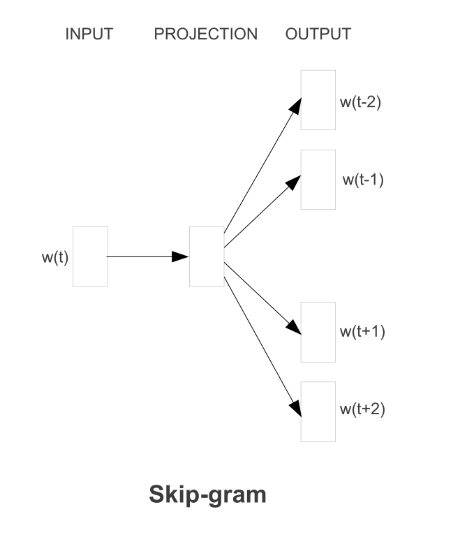

On suppose que l'on a à disposition un corpus de textes, duquel on peut 
extraire un vocabulaire. On notera $V \in \mathbb{N}$ le nombre de mots uniques
dans le vocabulaire. Les mots sont représentés par des vecteurs "one-hot", 0-1
de taille $V$. La couche cachée, avec $N$ neurones ($N$ est un paramètre)
 a pour fonction d'activation l'identité. 
La couche de sortie a $C$ neurones, avec $C$ la taille de la fenêtre de contexte 
(le nombre de mots de contexte qui doivent être prédits par l'algorithme,
, $C=2$ par exemple), et sa fonction d'activation 
est un softmax, qui à chacun des $C$ mots associe un vecteur de taille $V$
contenant les probabilités que ce mot soit chacun des mots du dictionnaire.

Dans le contexte du Word2Vec, nous ne nous intéressons qu'aux poids qui 
relient les inputs à la couche cachée à $d$ neurones.
 Ce sont eux qui vont nous permettre d'obtenir une représentation 
 vectorielle dense de dimension $N$ pour chacun des mots de $V$. Si $X$
est le vecteur 0-1 qui représente un mot et $W$ la matrice des poids reliant 
les inputs à la couche cachée, alors on peut définir $X_emb$, l'embedding en 
dimension $N$ de $X$, par:


\begin{align}
    X_{\text{emb}} = X^{T}  W 
    \label{eq:embeddinform}
\end{align}
\begin{align*}
    X  =
    \left (
    \begin{array}{c}
        0 \\
        \vdots \\
        0 \\
        1 \\
        0 \\
        \vdots \\
        0
    \end{array}
    \right ) \in \{ 0, 1\}^{V}
    , \ \
    W = \left (
    \begin{array}{ccc}
        w_{1,1} & \dots & w_{1, N} \\
        \vdots  &       & \vdots \\
        w_{V,1} & \dots & w_{V, N} \\ 
    \end{array}
    \right ) \in \mathbb{R}^{(V, N)}, \ \ 
    X_{\text{emb}} \in \mathbb{R}^{N}
\end{align*}




La valeur linguistique du Skip-Gram
est sous-tendue par une hypothèse linguistique fondamentale, 
appelée "hypothèse de distribution". Selon cette hypothèse, 
des mots qui apparaissent dans des contextes similaires 
sont plus susceptibles d'avoir 
la même signification. Cette idée est résumée par 
une citation très populaire de Firth, 1957 : *"Un mot est caractérisé par 
la compagnie qu'il a"*. Avec le modèle Skip-Gram, 
les mots qui apparaissent dans le même contexte 
sont plus susceptibles d'avoir 
des représentations vectorielles similaires, et ainsi, 
si l'hypothèse de distribution de Firth est vraie, les mots avec 
une représentation proche (au sens vectoriel) aura probablement le même sens.
C'est ce que les résultats empiriques montrent en général. 


On va voir cette valeur linguistique dans la pratique, sur le corpus des overviews.

Pour cela, il faut d'abord nettoyer le corpus en:

- tokenizant (c'est à dire délimiter les frontières entre les mots, ce qui consiste à plus que faire un ```.split(' ')```en raison de la présence de ponctuation (```'They're nice.'``` doit devenir ```["They", "'", "re", "nice", "."]```, ou à la limite ```["They're", "nice", "."]``` mais pas ```["They're", "nice."]```. Pour cette tâche, on utilisera et comparera des tokenizer dans NLTK
- en remplaçant les tokens qui représentent des nombres par le token ```NUM```
- éventuellement, selon l'utilisation, en passant tous les mots en miniscules, afin de ne pas faire epxloser la taille du vocabulaire (sinon, ```Chat``` et ```chat``` comptent comme deux mots différents). Si l'on est sur un corpus avec beaucoup de noms propres, cependant, il peut être intéressant de laisser à chaque mot ses majuscules. 

Ensuite, on utilisera gensim pour générer des embeddings. 

In [80]:
# from nltk.tokenize import ToktokTokenizer
# toktok = ToktokTokenizer()
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
def preprocessor(x):
    tokens = word_tokenize(x)
    for i in range(len(tokens)):
        try:
            float(tok[i])
            tokens[i] = 'NUM'
        except:
            tokens[i] = tokens[i].lower()
    return tokens           

[nltk_data] Downloading package punkt to /Users/salome/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [81]:
df['overview_clean'] = df.overview.swifter.apply(preprocessor)

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [82]:
sentences = df.overview_clean.array  # Création de notre corpus, pour gensim : liste de listes de tokens.

On définit un modèle Word2Vec avec les paramètres suivants:

- ```sentences``` servira à définir le vocabulaire.
- ```size``` correspond à la dimension des embeddings
- ```window```correspond à la fenêtre de contexte pour le Word2Vec
- ```workers```permet de paralléliser les calculs sur le nombre de coeurs logiques voulu.


Ensuite, on entraîne avec les paramètres suivants:

- ```sentences```est le corpus sur lequel les embeddings sont entraînés
- ```epochs``` est le nombre de fois que le réseau de neurones verra le dataset complet (i.e. 3 epochs = toutes les phrases du dataset sont passées 3 fois dans le réseau). 
- ```total_examples```est un paramètre pour Gensim mais il n'est pas d'intérêt ici. 

In [101]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, size=100, window=5, workers=4) 

In [102]:
model.train(sentences, epochs=100, total_examples=len(sentences))

(190105213, 278291100)

Maintenant que le modèle est entraîné, on peut accéder à nos embeddings, et calculer des distances entre les mots : 

In [153]:
# model.wv['american'] (pour accéder au vecteur)

In [104]:
model.wv.most_similar(['american'])

[('indian', 0.5954558849334717),
 ('australian', 0.5947948694229126),
 ('korean', 0.5686920285224915),
 ('italian', 0.5648338794708252),
 ('unnamed', 0.5455442667007446),
 ('african', 0.5415443181991577),
 ('british', 0.5395276546478271),
 ('africa', 0.5394771695137024),
 ('america', 0.5148426294326782),
 ('european', 0.5071295499801636)]

In [105]:
model.wv.most_similar(['german'])

[('russian', 0.706658124923706),
 ('french', 0.7006711959838867),
 ('british', 0.6950783729553223),
 ('japanese', 0.5871707797050476),
 ('polish', 0.5653404593467712),
 ('allied', 0.5594543218612671),
 ('spanish', 0.5237394571304321),
 ('hungarian', 0.5110633969306946),
 ('greek', 0.5021350383758545),
 ('soviet', 0.4994301497936249)]

In [106]:
model.wv.most_similar(['woman'])

[('girl', 0.8342278599739075),
 ('man', 0.8019335269927979),
 ('boy', 0.6905571222305298),
 ('widow', 0.6331672072410583),
 ('schoolgirl', 0.6124118566513062),
 ('lady', 0.6101078987121582),
 ('doctor', 0.5910288095474243),
 ('couple', 0.587404727935791),
 ('prostitute', 0.5862715244293213),
 ('housewife', 0.5637763738632202)]

In [107]:
model.wv.most_similar(['man'])

[('woman', 0.8019335269927979),
 ('boy', 0.6830469369888306),
 ('person', 0.6665498614311218),
 ('guy', 0.6343482732772827),
 ('girl', 0.6277250647544861),
 ('businessman', 0.5695167779922485),
 ('doctor', 0.5566256046295166),
 ('industrialist', 0.5484250783920288),
 ('lady', 0.5480961203575134),
 ('stranger', 0.5419880151748657)]

In [119]:
model.wv.most_similar(['september'])

[('february', 0.7930305600166321),
 ('november', 0.7602800726890564),
 ('december', 0.748563289642334),
 ('july', 0.7432801723480225),
 ('october', 0.741482675075531),
 ('january', 0.7394894361495972),
 ('april', 0.6662518978118896),
 ('march', 0.6561836004257202),
 ('june', 0.6423262357711792),
 ('august', 0.6311318874359131)]

In [120]:
model.wv.most_similar(['computer'])

[('dna', 0.5729106664657593),
 ('software', 0.5685489773750305),
 ('satellite', 0.5273171663284302),
 ('lab', 0.5203267335891724),
 ('serum', 0.5100677013397217),
 ('vaccine', 0.5081146955490112),
 ('top-secret', 0.5034869909286499),
 ('atomic', 0.485113263130188),
 ('formula', 0.47948428988456726),
 ('robot', 0.47460415959358215)]

On peut assez facilement voir les biais sociaux du dataset. 

Essayons maintenant d'aggréger ces embeddings, en utilisant la moyenne sur chaque ```overview``` : si $e_x$ désigne l'embedding du mot $x$, et que notre overview est constituée des mots $x_1, ..., x_t$, l'embedding de l'overview est:
$$\frac{1}{t} \sum_{i=1}^t e_{x_i}$$

Cette aggrégation permet de surmonter le fait que les overview sont de tailles variables. Cependant, elle implique que les overview sont des *bag-of-words* : l'ordre des mots dans la phrase n'a aucune importance. Dans la littérature, on utilise plutôt des réseaux de neurones récurrents ou des mécanismes d'attention pour aggréger des séquences de taille variable, mais cela sort du cadre de ce cours. 

In [130]:
dataset = df[['adult', 'budget', 'runtime', 'original_language', 'overview', 'popularity', 'vote_average', 'revenue']]
dic_language = Counter(dataset.original_language)
dic_language = {list(dic_language.keys())[i]: i for i in range(len(dic_language))}

dataset['adult'] = dataset.adult.swifter.apply(lambda x: 1 if x==True else 0)
dataset['original_language'] = dataset.original_language.swifter.apply(lambda x: dic_language[x])
dataset['overview'] = dataset.overview.swifter.apply(preprocessor) 

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [135]:
def mean_emb(x):
    acc = np.array([0]*100)
    n = len(acc)
    for elt in x:
        try:
            acc = acc + model.wv[str(elt)]
        except:
            acc = acc + np.array([0]*100)
    return acc/n

In [136]:
dataset['overview_emb'] = dataset.overview.swifter.apply(mean_emb)

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
for i in range(100):

    dataset['embedding'+str(i)] = dataset.overview_emb.apply(lambda x: x[i])

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
dataset.head()

,adult,budget,runtime,original_language,overview,popularity,vote_average,revenue,overview_emb,embedding0,...,embedding90,embedding91,embedding92,embedding93,embedding94,embedding95,embedding96,embedding97,embedding98,embedding99
0,0,30000000.0,81.0,0,"[led, by, woody, ,, andy, 's, toys, live, happ...",21.946943,7.7,373554033.0,"[0.588452709838748, -0.301624558288604, 0.2086...",0.588453,...,0.378564,-0.095289,-0.207217,-0.040147,-0.151232,0.148070,-0.665708,-0.037258,0.227326,0.127778
1,0,65000000.0,104.0,0,"[when, siblings, judy, and, peter, discover, a...",17.015539,6.9,262797249.0,"[0.40376079618930816, 0.09972847572527826, -0....",0.403761,...,0.302559,-0.198700,-0.177549,-0.010927,-0.128646,-0.423444,-0.670530,-0.335689,0.058760,0.624457
2,0,0.0,101.0,0,"[a, family, wedding, reignites, the, ancient, ...",11.712900,6.5,0.0,"[0.5866376641392708, 0.009822156559675933, 0.0...",0.586638,...,0.136217,0.097413,-0.440052,0.133497,-0.185731,-0.428283,-0.955007,-0.112577,0.198231,0.365247
3,0,16000000.0,127.0,0,"[cheated, on, ,, mistreated, and, stepped, on,...",3.859495,6.1,81452156.0,"[0.21523798525333404, -0.022943648928776383, 0...",0.215238,...,0.286706,0.050758,-0.107714,0.119012,0.043881,-0.246228,-0.661256,-0.312217,0.393625,0.518147
4,0,0.0,106.0,0,"[just, when, george, banks, has, recovered, fr...",8.387519,5.7,76578911.0,"[0.627620096988976, -0.2647484218887985, 0.019...",0.627620,...,0.680850,0.199391,-0.637380,0.078417,0.418099,-0.093843,-0.757104,-0.105275,0.264602,0.442793


Regardons si cet embedding aggrégé améliore notre modèle : 

In [140]:
dataset = dataset.drop(['overview_emb', 'overview'], axis=1)

In [143]:
X = dataset.drop(['revenue', 'popularity', 'vote_average'], axis=1)
y = np.ravel(dataset['revenue'])

In [147]:
cross_val_score(RandomForestRegressor(), X, y, scoring='r2').mean()

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

0.5216312592152293

In [148]:
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(), X, y, scoring='r2').mean()

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5914066078197373

In [149]:
from sklearn.linear_model import Lasso
cross_val_score(Lasso(), X, y, scoring='r2').mean()

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5398915727286338e+19, tolerance: 9648400701354002.0
  positive)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7058052033617207e+19, tolerance: 1.1677799355777616e+16
  positive)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective 

0.59140685264319

In [151]:
y = np.ravel(dataset['popularity'])
print(cross_val_score(RandomForestRegressor(), X, y, scoring='r2').mean())
print(cross_val_score(LinearRegression(), X, y, scoring='r2').mean())
print(cross_val_score(Lasso(), X, y, scoring='r2').mean())

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

-0.2569988313311771


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.15117319669787888
0.1442755716079848


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [152]:
y = np.ravel(dataset['vote_average'])
print(cross_val_score(RandomForestRegressor(), X, y, scoring='r2').mean())
print(cross_val_score(LinearRegression(), X, y, scoring='r2').mean())
print(cross_val_score(Lasso(), X, y, scoring='r2').mean())

/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

-0.18957814876706017


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


-0.07611847953262947


/usr/local/miniconda3/envs/ml_base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


-0.0680224910559795


L'embedding aggrégé n'améliore malheureusement pas vraiment nos modèles. 